In [10]:
import sys
import os
sys.path.append("/home/nakamura/network_dissection/NetDissect/src")
os.chdir("/home/nakamura/network_dissection/NetDissect/")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn

from viewprobe import NetworkProbe
from category_info import category_info
script = "/home/nakamura/network_dissection/NetDissect/research/concept_detection_comparison_0202.ipynb"
% matplotlib inline

In [11]:
# plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 10
plt.style.use("seaborn-white")

In [12]:
# define models
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "./dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "./dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "./dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "./dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face]

In [13]:
def n_detec(model, blob, threshold=0.05):
    """return ordered_iou averaged in a layer as pandas.Series"""
    
    path= os.path.join(model["directory"], blob + "-iou.csv")
    iou = pd.read_csv(path, index_col=0)
    iou_threshold = iou > threshold
    num_detec = iou_threshold.mean(axis=0)
    
    return num_detec

In [14]:
def n_detec_summary(model, concept):
    n_detec_list = []
    for blob in model["blobs"]:
        n = n_detec(model, blob, threshold=0.03)[concept] 
        n_detec_list.append(n)
    return n_detec_list

In [15]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

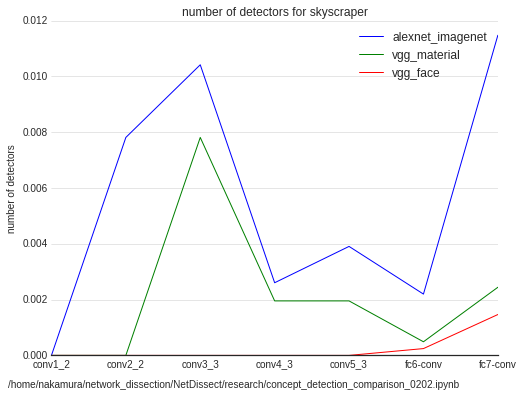

In [16]:
models = [alex, vgg_material, vgg_face]

result={}

concept = "skyscraper"
result[concept] = {}
fig, ax = plt.subplots(figsize=(8,6))
for model in models:
    n_detec_list = n_detec_summary(model, concept)
    result[concept][model["name"]] = n_detec_list
    ax.plot(n_detec_list, label=model["name"])
    ax.set_xlim(0,6)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    ax.yaxis.grid(True)
ax.set_xticklabels(vgg_material["blobs"])
ax.legend(loc="best")
ax.set_ylabel("number of detectors")
ax.set_title("number of detectors for {}".format(concept))
plt.figtext(0.05,0.05, script)
plt.show()

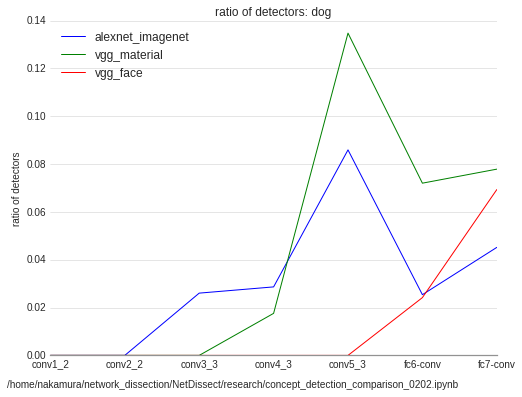

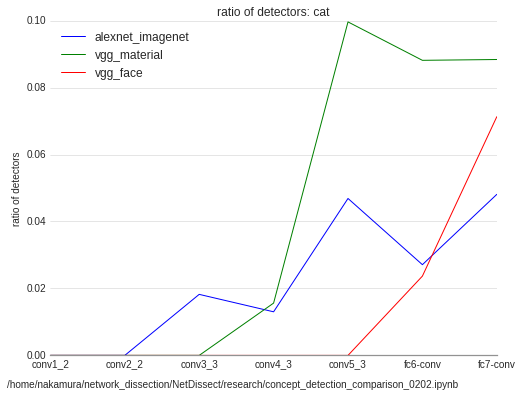

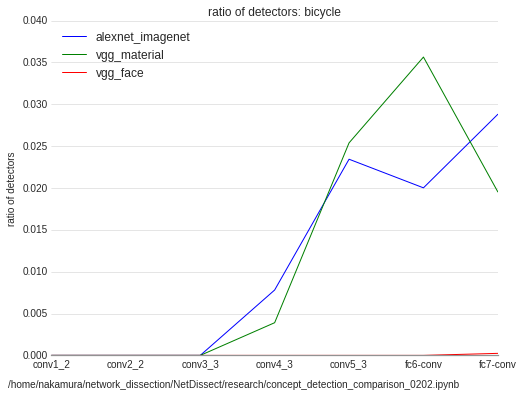

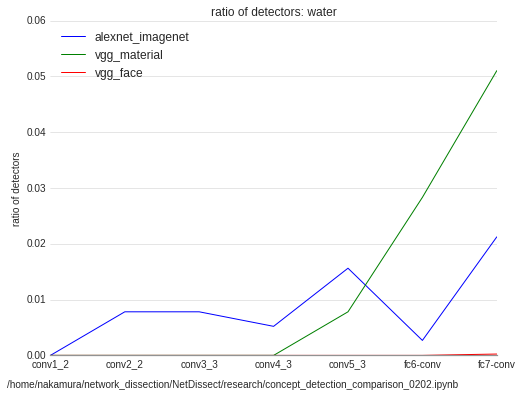

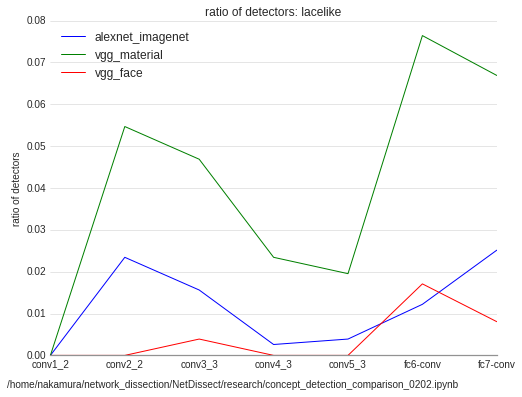

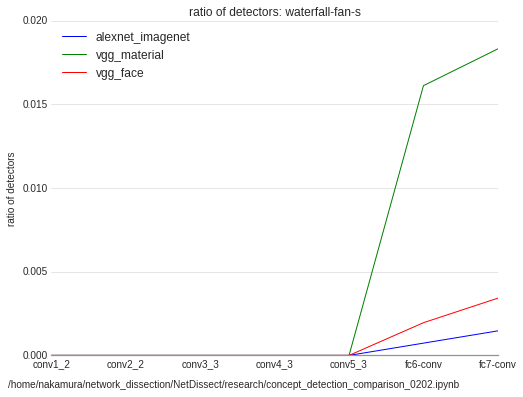

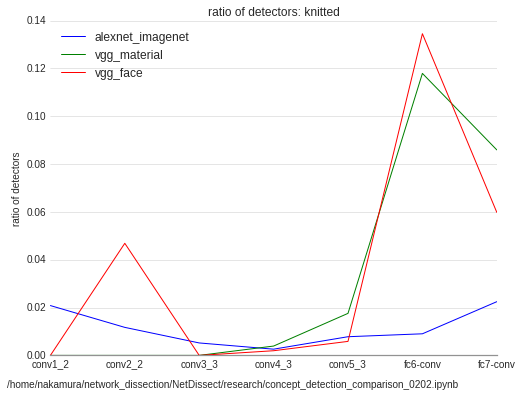

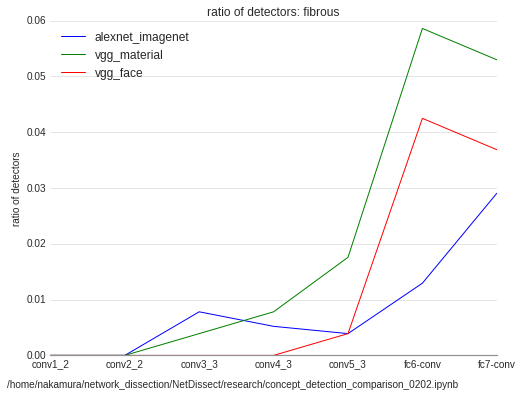

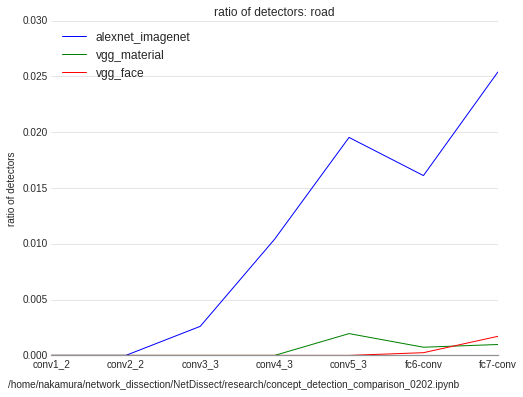

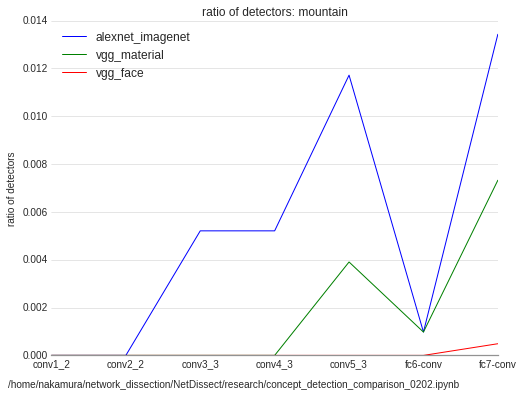

In [18]:
models = [alex, vgg_material, vgg_face]
concepts = ["dog", "cat", "bicycle", "water", "lacelike", "waterfall-fan-s", "knitted", "fibrous", "road", "mountain"]
result={}

for concept in concepts:
    result[concept] = {}
    fig, ax = plt.subplots(figsize=(8,6))
    for model in models:
        n_detec_list = n_detec_summary(model, concept)
        result[concept][model["name"]] = n_detec_list
        ax.plot(n_detec_list[:-1], label=model["name"])
    ax.set_xticklabels(vgg_material["blobs"])
    ax.legend(loc="best")

    ax.set_ylabel("ratio of detectors")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_alpha(0.5)
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")
    ax.yaxis.grid(True)
    ax.set_title("ratio of detectors: {}".format(concept))
    
    plt.figtext(0.05,0.05, script)
    
    savefile = os.path.join("./research/concept_detection/","num_of_detector_{}.pdf".format(concept))
    fig.savefig(savefile)
    plt.show()